# Mask Generation with OpenCV
In the paper they generate irregular masks by using occlusion/dis-occlusion between two consecutive frames of videos, as described in [this paper](https://lmb.informatik.uni-freiburg.de/Publications/2010/Bro10e/sundaram_eccv10.pdf). 

Instead we'll simply be using OpenCV to generate some irregular masks, which will hopefully perform just as well. We've implemented this in the function `random_mask`, which is located in the `util.py` file int he libs directory

In [3]:
import itertools
import matplotlib
import matplotlib.pyplot as plt
from libs.util import random_mask

# from libs.util import random_mask_rectangles

%matplotlib inline

Let us review of the code of this function

In [2]:
??random_mask


Finally, let's create some output samples with this function to see what it does

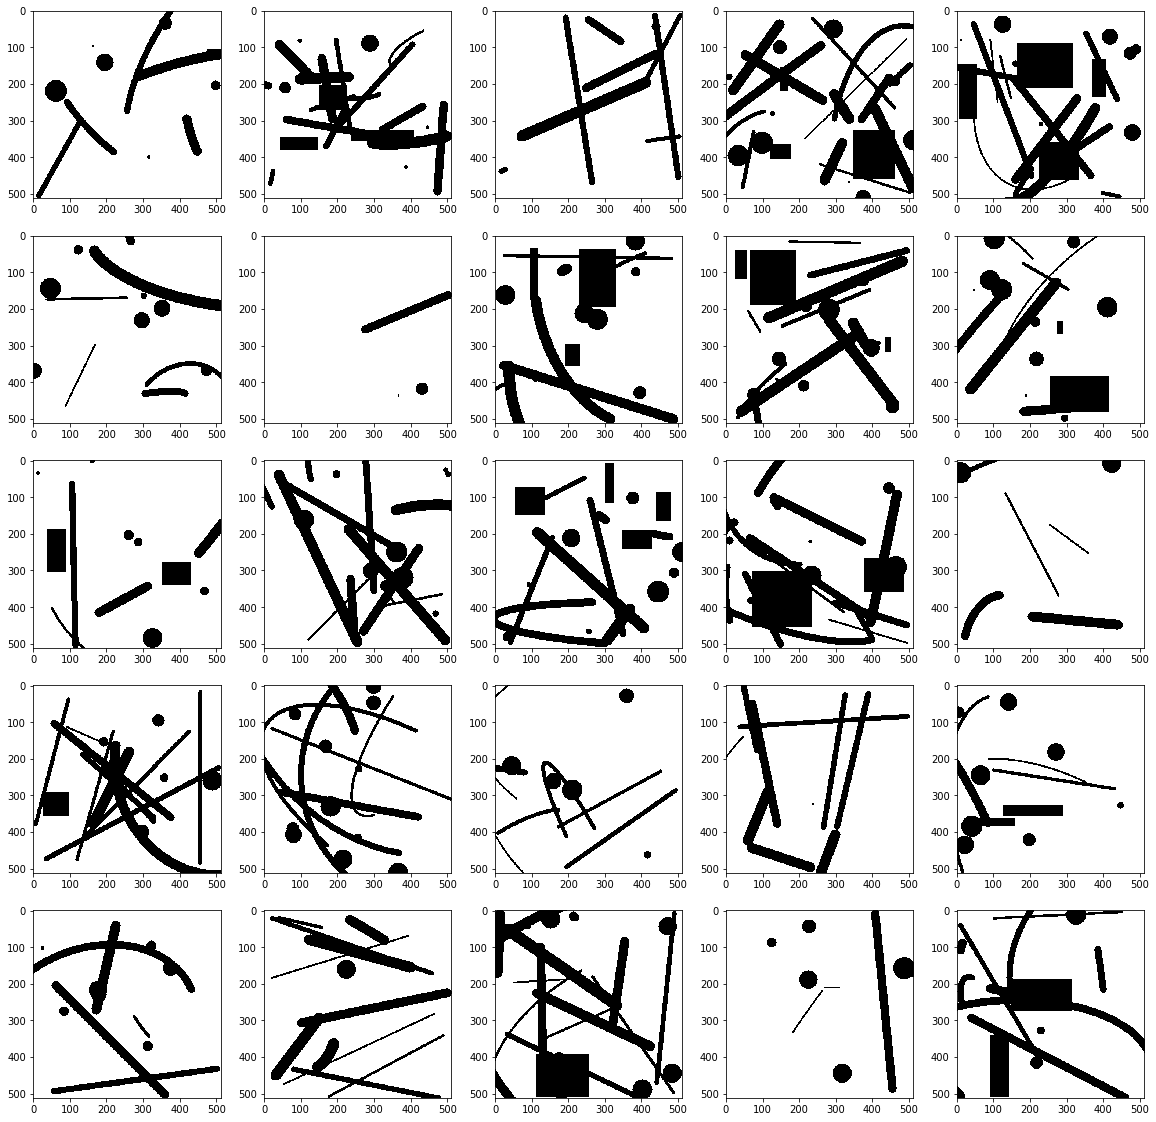

In [2]:
# Plot the results
_, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = list(itertools.chain.from_iterable(axes))

for i in range(len(axes)):
    
    # Generate image
    img = random_mask(512, 512)
    
    # Plot image on axis
    axes[i].imshow(img*255)

In [41]:
def count_nonblack_np(img):
    """Return the number of pixels in img that are not black.
    img must be a Numpy array with colour values along the last axis.

    """
    nonblack = img.any(axis=-1).sum()

    percent = nonblack/ (img.shape[0]*img.shape[1]) * 100
    return percent

def random_mask_rectangles(height, width, channels=3, percent_from=10., percent_to=20., only_rec = True):
    """Generate the random mask based on percentage of the entire image
    
    Arguments:
        height {int} -- height of the image
        width {int} -- width of the image
    
    Keyword Arguments:
        channels {int} -- chanel of the image (default: {3})
        percent_from {float} -- how many percent <from> (default: {10.})
        percent_to {float} -- how many percent <to> (default: {20.})
        only_rec {bool} -- only draw rectangles (default: {True})
    """        
    while True:
        img = np.zeros((height, width, channels), np.uint8)


        # Draw random rectangles
        for _ in range(randint(1, 20)):
            x1, x2 = randint(1, width), randint(1, width)
            y1, y2 = randint(1, height), randint(1, height)
            # thickness = randint(3, size)
            thickness = -1
            cv2.rectangle(img, (x1,y1), (x2,y2), (1,1,1), thickness)     
        
        if (only_rec != True): 
            # Set size scale
            size = int((width + height) * 0.03)
            if width < 64 or height < 64:
                raise Exception("Width and Height of mask must be at least 64!")
             
            # Draw random lines
            for _ in range(randint(1, 10)):
                x1, x2 = randint(1, width), randint(1, width)
                y1, y2 = randint(1, height), randint(1, height)
                thickness = randint(3, size)
                cv2.line(img,(x1,y1),(x2,y2),(1,1,1),thickness)
                
            # Draw random circles
            for _ in range(randint(1, 10)):
                x1, y1 = randint(1, width), randint(1, height)
                radius = randint(3, size)
                cv2.circle(img,(x1,y1),radius,(1,1,1), -1)
                
            # Draw random ellipses
            for _ in range(randint(1, 10)):
                x1, y1 = randint(1, width), randint(1, height)
                s1, s2 = randint(1, width), randint(1, height)
                a1, a2, a3 = randint(3, 180), randint(3, 180), randint(3, 180)
                thickness = randint(3, size)
                cv2.ellipse(img, (x1,y1), (s1,s2), a1, a2, a3,(1,1,1), thickness)


        if (percent_from <= count_nonblack_np(img) < percent_to):
            print ("percent: ", count_nonblack_np(img))
            break
        
    return 1-img

from random import randint
import itertools
import numpy as np
import cv2
import numpy as np
img = np.zeros((512, 512, 3), np.uint8)


percent:  53.0693054199
percent:  55.7994842529
percent:  57.0278167725
percent:  59.3769073486
percent:  51.1455535889
percent:  53.3710479736
percent:  51.0841369629
percent:  52.6187896729
percent:  59.118270874
percent:  58.0284118652
percent:  52.6290893555
percent:  54.3888092041
percent:  56.8927764893
percent:  53.4561157227
percent:  56.2133789063
percent:  51.944732666
percent:  53.0776977539
percent:  57.7068328857
percent:  51.3961791992
percent:  56.5731048584
percent:  54.2869567871
percent:  54.0897369385
percent:  54.9751281738
percent:  59.0766906738
percent:  52.7317047119


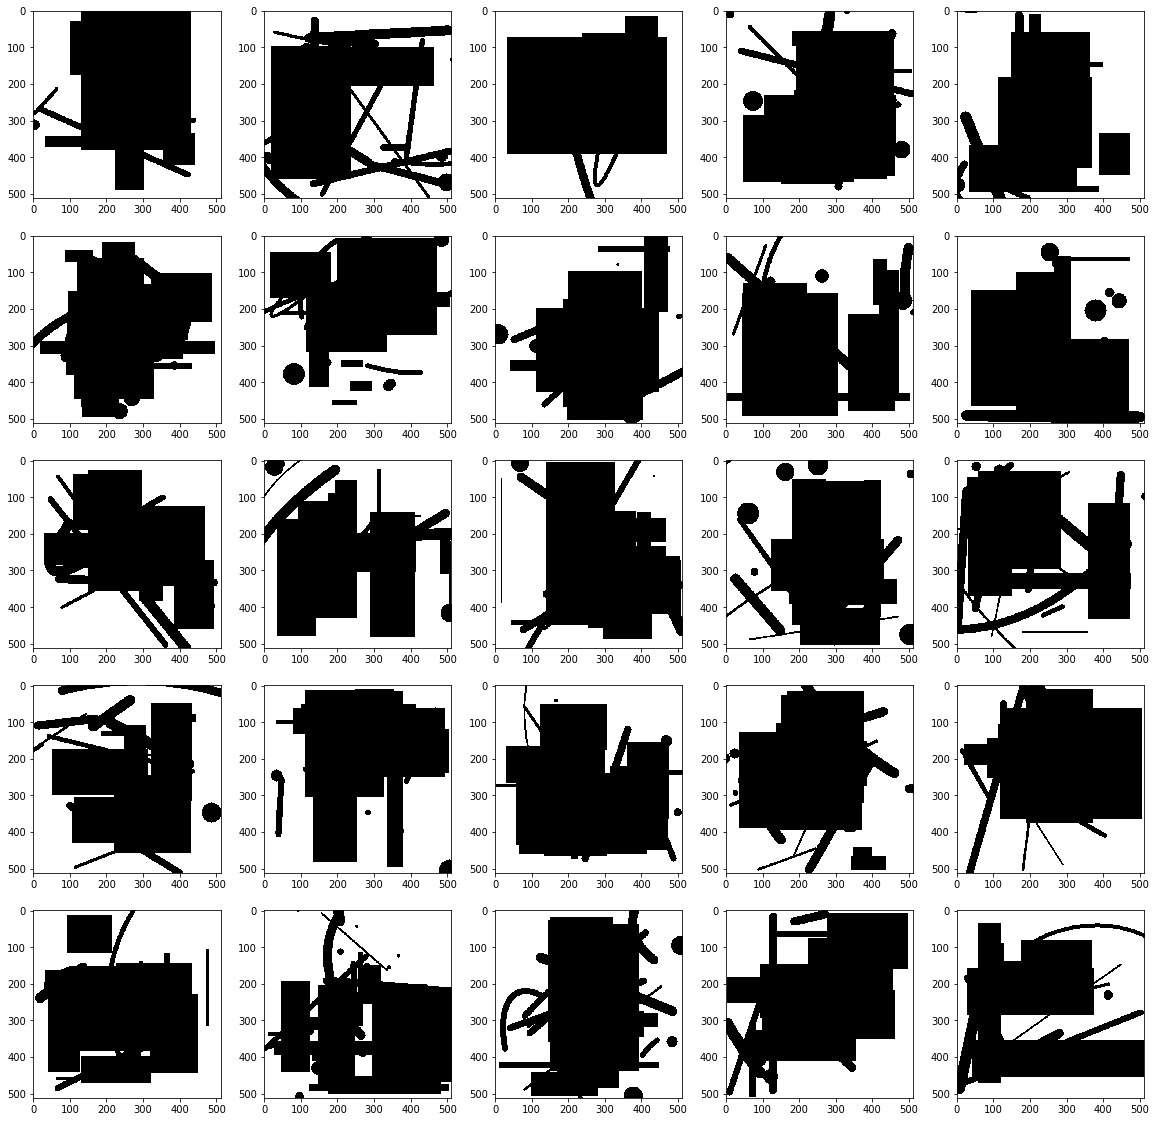

In [45]:
count_nonblack_np(img)
# Plot the results
_, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = list(itertools.chain.from_iterable(axes))

for i in range(len(axes)):
    
    # Generate image
    img = random_mask_rectangles(512, 512,3, 50, 60, False)
    
    # Plot image on axis
    axes[i].imshow(img*255)

In [18]:
??random_mask_rectangles

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


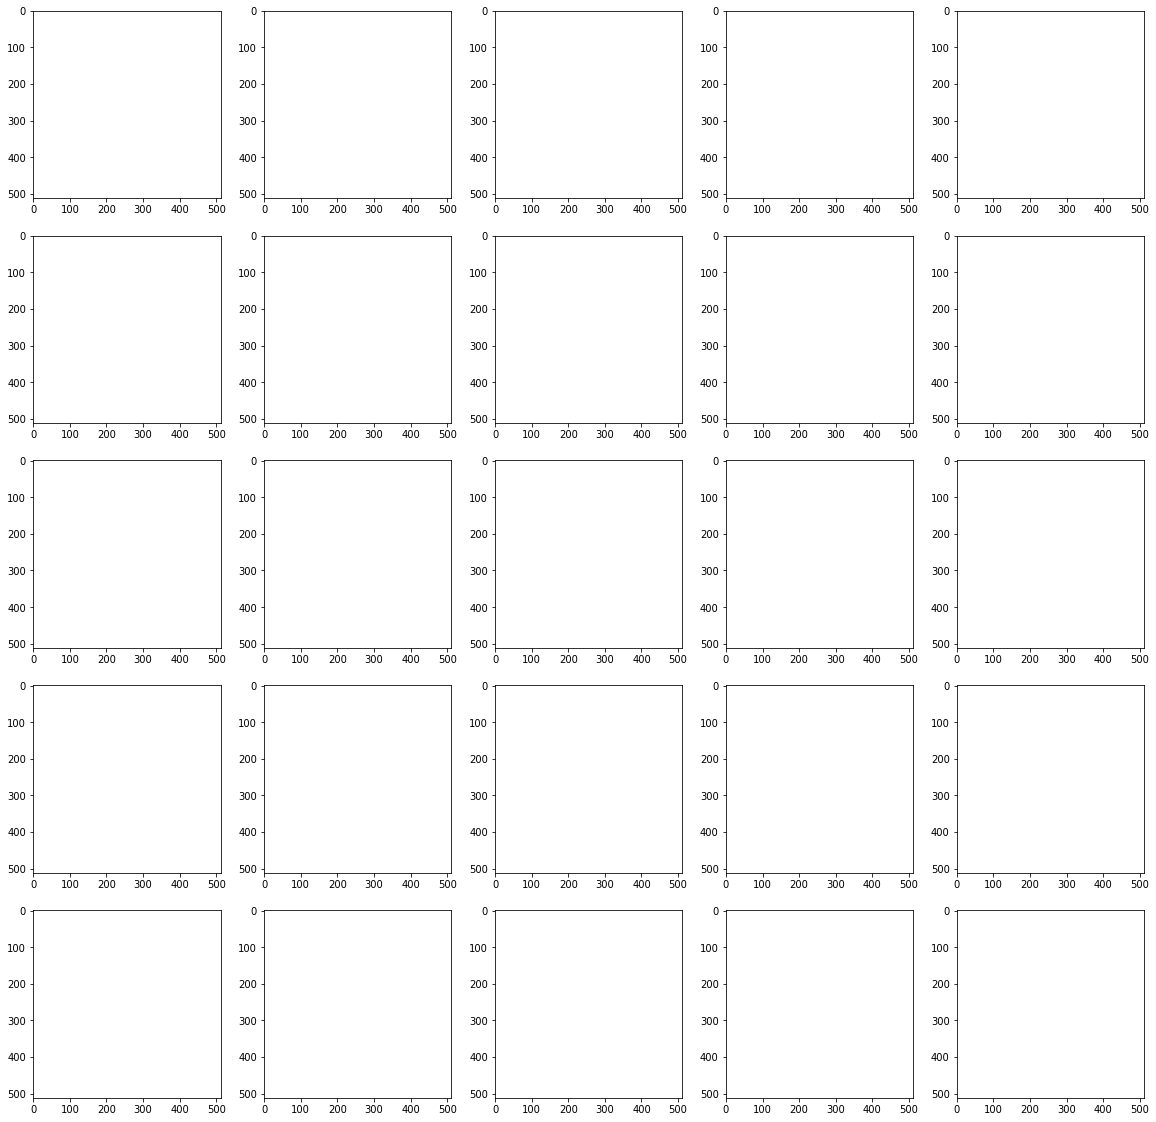

## calculate

In [4]:
# This will list all magic commands
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python  %%python2  %%py

In [5]:
%who


axes	 i	 img	 itertools	 matplotlib	 plt	 random_mask	 
